In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime

In [2]:
data_ = pd.read_csv('./beer_reviews.csv')
data = pd.DataFrame(data_)
data[:5]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


### Data cleaning

In [3]:
review_year = []
review_month = []
review_day = []
review_hour = []
review_weekday = []
for t in data['review_time']:
    T = datetime.datetime.fromtimestamp(t)
    review_year.append(T.year)
    review_month.append(T.month)
    review_day.append(T.day)
    review_hour.append(T.hour)
    review_weekday.append(T.weekday())

data['review_year'] = review_year
data['review_month'] = review_month
data['review_day'] = review_day
data['review_hour'] = review_hour
data['review_weekday'] = review_weekday

beer_style = list(set(data['beer_style']))
style = []
for i in data['beer_style']:
    style.append(beer_style.index(i))
data['beer_styleid'] = style

user_id = []
user_name = set(data['review_profilename'])
user_name = dict(zip(user_name,range(len(user_name))))
for i in data['review_profilename']:
    user_id.append(user_name[i])
data['user_id'] = user_id

data['beer_id'] = data['beer_beerid']

data_clean = data[['brewery_id','beer_id','user_id','review_overall',
            'review_aroma','review_appearance','review_palate',
            'review_taste','beer_abv','beer_styleid','review_year',
            'review_month','review_day','review_weekday','review_hour']]
data_clean.rename(columns={'beer_styleid': 'beer_style'}, inplace=True) 
data_clean[:5]

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,brewery_id,beer_id,user_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_style,review_year,review_month,review_day,review_weekday,review_hour
0,10325,47986,13255,1.5,2.0,2.5,1.5,1.5,5.0,54,2009,2,16,0,12
1,10325,48213,13255,3.0,2.5,3.0,3.0,3.0,6.2,81,2009,3,1,6,5
2,10325,48215,13255,3.0,2.5,3.0,3.0,3.0,6.5,60,2009,3,1,6,6
3,10325,47969,13255,3.0,3.0,3.5,2.5,3.0,5.0,44,2009,2,15,6,11
4,1075,64883,1159,4.0,4.5,4.0,4.0,4.5,7.7,87,2010,12,30,3,10


### Generating train, validation, test dataset

In [7]:
from sklearn.model_selection import train_test_split 
data_train, data_val = train_test_split(data_clean, test_size=100000, random_state=7)
data_train, data_test = train_test_split(data_train, test_size=100000, random_state=7)
data_train.to_csv('beer_train.csv', index=False)
data_val.to_csv('beer_val.csv', index=False)
data_test.to_csv('beer_test.csv', index=False)

### Power law of brewer reviews

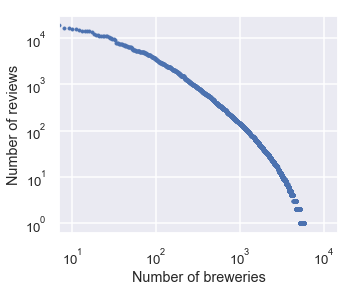

In [226]:
brewer_num = defaultdict(int)
for i in data['brewery_id']:
    brewer_num[i] += 1
brewer_num_srt = sorted(brewer_num.items(),key=lambda x: x[1], reverse=True)
brewer_num_srt = np.array(brewer_num_srt)
sns.set(style="darkgrid", context="talk", font_scale=0.8)
f, ax = plt.subplots(figsize=(5, 4))
ax.set(xscale="log", yscale="log")
ax.set_xlim([1e1-3,1e4+5000])
ax.set_ylim([1e0-0.4,3e4])
ax.set_xlabel('Number of breweries')
ax.set_ylabel('Number of reviews')
#sns.scatterplot(x=range(len(brewer_num_srt)),y=brewer_num_srt[:,1].astype(int), ax=ax, s=30, color="b", marker="+")
sns.scatterplot(x=range(len(brewer_num_srt)),y=brewer_num_srt[:,1].astype(int), ax=ax, s=10, edgecolor=None)

### Power law of beer reviews and people reviews

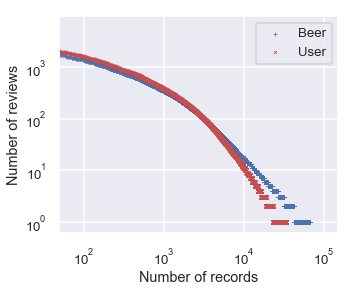

In [230]:
beer_num = defaultdict(int)
for i in data['beer_beerid']:
    beer_num[i] += 1
beer_num_srt = sorted(beer_num.items(),key=lambda x: x[1], reverse=True)
beer_num_srt = np.array(beer_num_srt)

p_num = defaultdict(int)
for i in data['review_profilename']:
    p_num[i] += 1
p_num_srt = sorted(p_num.items(),key=lambda x: x[1], reverse=True)
p_num_srt = np.array(p_num_srt)

f, ax = plt.subplots(figsize=(5, 4))
ax.set(xscale="log", yscale="log")
ax.set_xlim([1e2-50,1e5+50000])
#ax.set_ylim([1e0-0.3,2e4])
ax.set_xlabel('Number of records')
ax.set_ylabel('Number of reviews')
sns.scatterplot(x=range(len(beer_num_srt)),y=beer_num_srt[:,1].astype(int), ax=ax, s=10, color="b", marker="+")
sns.scatterplot(x=range(len(p_num_srt)),y=p_num_srt[:,1].astype(int), ax=ax, s=10, color="r", marker="x")
plt.legend(['Beer','User'])  
plt.show()

### Pdf of reviews

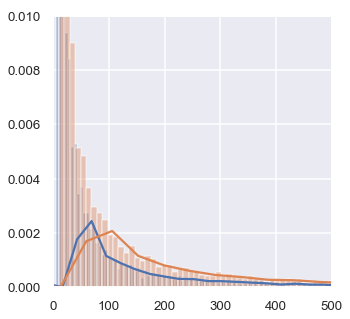

In [59]:
f, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim([0,500])
ax.set_ylim([0,0.01])
sns.distplot(beer_num_srt[:20000,1], bins=600)
sns.distplot(p_num_srt[:10000,1].astype(int), bins=600)

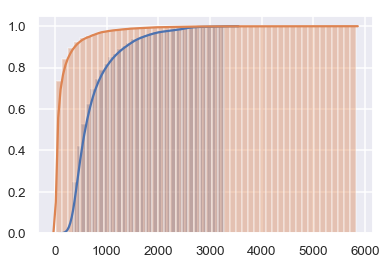

In [27]:
sns.distplot(beer_num_srt[:1000,1],hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
sns.distplot(p_num_srt[:10000,1].astype(int),hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

### Average overall rating for each beer style

In [270]:
styles = list(set(data['beer_style']))
avg = []
for s in styles:
    avg.append(np.mean(list(data[data['beer_style'] == s]['review_overall'])))

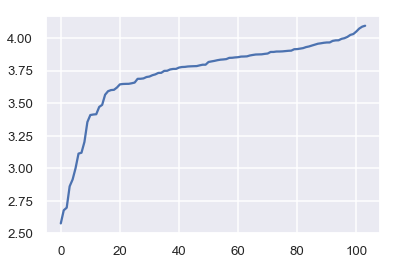

In [275]:
plt.plot(sorted(avg))

### Review number and rating related to time

In [139]:
year = list(set(data['review_year']))
year_count = []
year_rate = []
for y in year:
    year_count.append(len(data[data['review_year'] == y]))
    year_rate.append(np.mean(list(data[data['review_year'] == y]['review_overall'])))
    
month = list(set(data['review_month']))
month_count = []
month_rate = []
for m in month:
    month_count.append(len(data[data['review_month'] == m]))
    month_rate.append(np.mean(list(data[data['review_month'] == m]['review_overall'])))
    
week = list(set(data['review_weekday']))
week_count = []
week_rate = []
for w in week:
    week_count.append(len(data[data['review_weekday'] == w]))
    week_rate.append(np.mean(list(data[data['review_weekday'] == w]['review_overall'])))

Text(0,0.5,'Number of reviews')

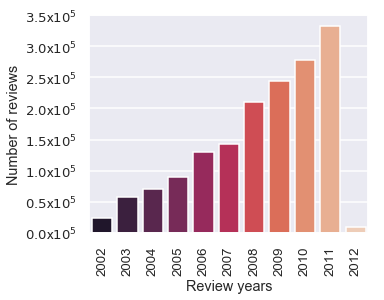

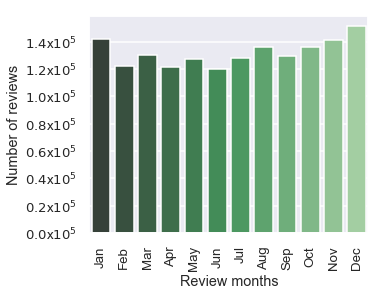

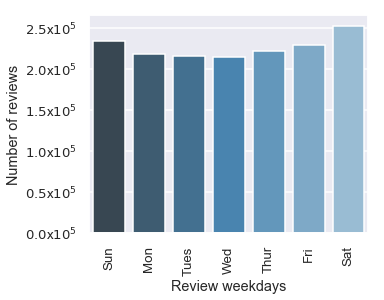

In [163]:
from matplotlib.ticker import FuncFormatter
def formatnum(x, pos):
    return '$%.1f$x$10^{5}$' % (x/100000)
formatter = FuncFormatter(formatnum)

f, ax = plt.subplots(figsize=(5, 4))
sns.barplot(year[5:], year_count[5:], palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Review years')
ax.set_ylabel('Number of reviews')

f, ax = plt.subplots(figsize=(5, 4))
sns.barplot(month, month_count, palette="Greens_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Review months')
ax.set_ylabel('Number of reviews')

f, ax = plt.subplots(figsize=(5, 4))
sns.barplot(week, week_count, palette="Blues_d")
ax.yaxis.set_major_formatter(formatter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(['Sun','Mon','Tues','Wed','Thur','Fri','Sat'])
ax.set_xlabel('Review weekdays')
ax.set_ylabel('Number of reviews')

Text(0,0.5,'Average rating')

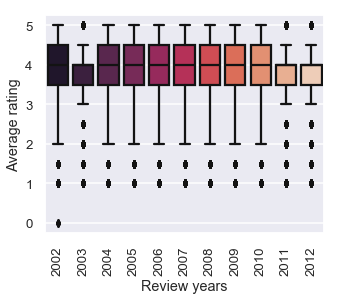

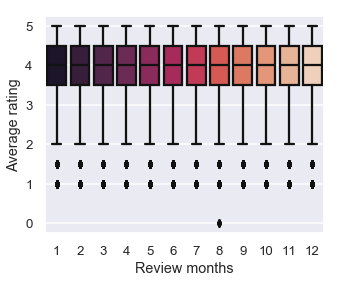

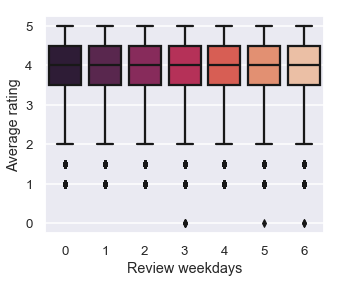

In [142]:
f, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='review_year',y='review_overall',data=data[data['review_year']>2001], palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Review years')
ax.set_ylabel('Average rating')

f, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='review_month',y='review_overall',data=data, palette='rocket')
ax.set_xlabel('Review months')
ax.set_ylabel('Average rating')

f, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(x='review_weekday',y='review_overall',data=data, palette='rocket')
ax.set_xlabel('Review weekdays')
ax.set_ylabel('Average rating')

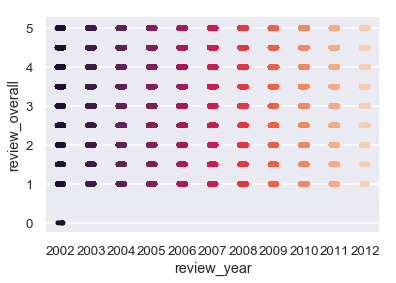

In [168]:
sns.stripplot(x='review_year',y='review_overall',data=data[data['review_year']>2001], palette='rocket')

### Correlation between features

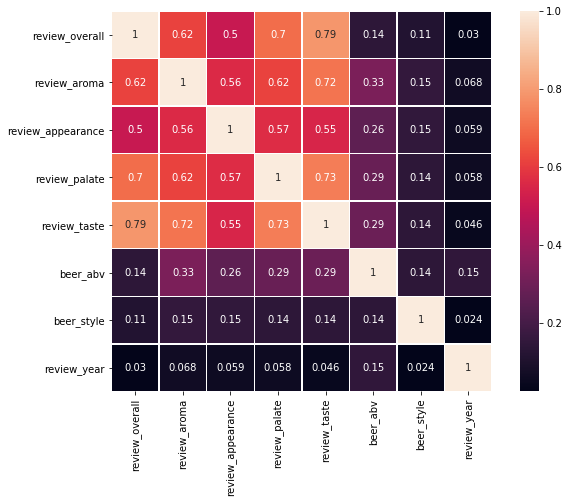

In [4]:
f, ax = plt.subplots(figsize=(10, 7))
internal_chars = ['review_overall','review_aroma','review_appearance',
                  'review_palate', 'review_taste','beer_abv','beer_style',
                  'review_year']
corr = data_clean[internal_chars].corr()
sns.heatmap(corr, square=True, linewidths=.5, annot=True)
plt.show()

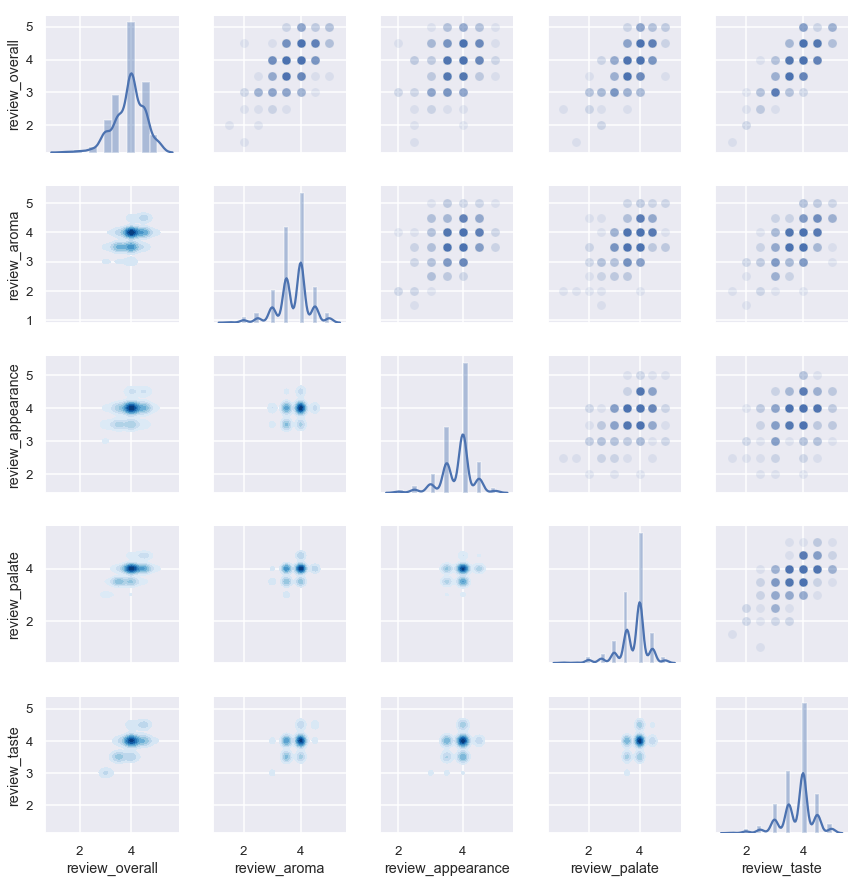

In [27]:
sns.set(style="darkgrid", context="talk", font_scale=0.8)
internal_chars = ['review_overall','review_aroma','review_appearance',
                  'review_palate', 'review_taste']
g = sns.PairGrid(data_clean[internal_chars][:300], diag_sharey=False)
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False, cmap='Blues')
g.map_upper(sns.scatterplot, alpha = 0.1)
g.map_diag(sns.distplot)

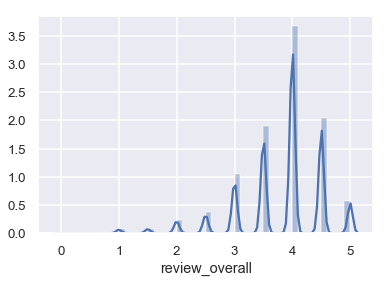

In [28]:
sns.distplot(data_clean['review_overall'])